In [1]:
import networkx as nx
from networkx.algorithms import chordal

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(''), '..')))
import weighted_imputation as wi
from weighted_imputation.structures import DirectedGraph

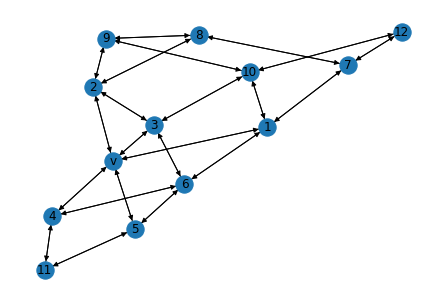

In [3]:
graph = DirectedGraph()
graph.add_node('v');graph.add_node(1);graph.add_node(2);graph.add_node(3);graph.add_node(4);graph.add_node(5)
graph.add_node(6);graph.add_node(7);graph.add_node(8);graph.add_node(9);graph.add_node(10);graph.add_node(11);
graph.add_node(12)

graph.add_edge('v',1);graph.add_edge('v',2);graph.add_edge('v',3);graph.add_edge('v',4);graph.add_edge('v',5)
graph.add_edge(1,'v');graph.add_edge(1,6);graph.add_edge(1,7);graph.add_edge(1,10)
graph.add_edge(2,'v');graph.add_edge(2,3);graph.add_edge(2,8);graph.add_edge(2,9)
graph.add_edge(3,'v');graph.add_edge(3,2);graph.add_edge(3,6);graph.add_edge(3,10)
graph.add_edge(4,'v');graph.add_edge(4,6);graph.add_edge(4,11)
graph.add_edge(5,'v');graph.add_edge(5,6);graph.add_edge(5,11)
graph.add_edge(6,1);graph.add_edge(6,3);graph.add_edge(6,4);graph.add_edge(6,5)
graph.add_edge(7,1);graph.add_edge(7,8);graph.add_edge(7,12)
graph.add_edge(8,2);graph.add_edge(8,7);graph.add_edge(8,9)
graph.add_edge(9,2);graph.add_edge(9,8);graph.add_edge(9,10)
graph.add_edge(10,1);graph.add_edge(10,3);graph.add_edge(10,9);graph.add_edge(10,12)
graph.add_edge(11,4);graph.add_edge(11,5)
graph.add_edge(12,7);graph.add_edge(12,10)

graph.plot()

In [4]:
my_graph_test = DirectedGraph.from_string("[1][8][2|1:8][5|1][6|5][3|2][4|2][7|3:4:6]")

# https://www.bnlearn.com/documentation/man/learning-test.html
learning_graph = DirectedGraph.from_string("[A][C][F][B|A][D|A:C][E|B:F]")

# https://www.bnlearn.com/documentation/man/asia.html
asia_graph = DirectedGraph.from_string("[A][S][T|A][L|S][B|S][D|B:E][E|T:L][X|E]")

# https://www.bnlearn.com/documentation/man/clgaussian-test.html
clgaussian_graph = DirectedGraph.from_string("[A][B][C][H][D|A:H][F|B:C][E|B:D][G|A:D:E:F]")

# https://www.bnlearn.com/documentation/man/alarm.html
alarm_graph = DirectedGraph.from_string("[HIST|LVF][CVP|LVV][PCWP|LVV][HYP][LVV|HYP:LVF][LVF]" +
                                "[STKV|HYP:LVF][ERLO][HRBP|ERLO:HR][HREK|ERCA:HR][ERCA][HRSA|ERCA:HR][ANES]" +
                                "[APL][TPR|APL][ECO2|ACO2:VLNG][KINK][MINV|INT:VLNG][FIO2][PVS|FIO2:VALV]" +
                                "[SAO2|PVS:SHNT][PAP|PMB][PMB][SHNT|INT:PMB][INT][PRSS|INT:KINK:VTUB][DISC]" +
                                "[MVS][VMCH|MVS][VTUB|DISC:VMCH][VLNG|INT:KINK:VTUB][VALV|INT:VLNG]" +
                                "[ACO2|VALV][CCHL|ACO2:ANES:SAO2:TPR][HR|CCHL][CO|HR:STKV][BP|CO:TPR]")

# https://www.bnlearn.com/documentation/man/insurance.html
insurance_graph = DirectedGraph.from_string("[Age][Mileage][SocioEcon|Age][GoodStudent|Age:SocioEcon]" + 
                              "[RiskAversion|Age:SocioEcon][OtherCar|SocioEcon]" +
                              "[VehicleYear|SocioEcon:RiskAversion][MakeModel|SocioEcon:RiskAversion]" + 
                              "[SeniorTrain|Age:RiskAversion][HomeBase|SocioEcon:RiskAversion]" +
                              "[AntiTheft|SocioEcon:RiskAversion][RuggedAuto|VehicleYear:MakeModel]" +
                              "[Antilock|VehicleYear:MakeModel][DrivingSkill|Age:SeniorTrain]" +
                              "[CarValue|VehicleYear:MakeModel:Mileage][Airbag|VehicleYear:MakeModel]" +
                              "[DrivQuality|RiskAversion:DrivingSkill][Theft|CarValue:HomeBase:AntiTheft]" +
                              "[Cushioning|RuggedAuto:Airbag][DrivHist|RiskAversion:DrivingSkill]" +
                              "[Accident|DrivQuality:Mileage:Antilock][ThisCarDam|RuggedAuto:Accident]" +
                              "[OtherCarCost|RuggedAuto:Accident][MedCost|Age:Accident:Cushioning]" +
                              "[ILiCost|Accident][ThisCarCost|ThisCarDam:Theft:CarValue]" +
                              "[PropCost|ThisCarCost:OtherCarCost]")

# https://www.bnlearn.com/documentation/man/hailfinder.html
hailFinder_graph = DirectedGraph.from_string("[N07muVerMo][SubjVertMo][QGVertMotion][SatContMoist][RaoContMoist]" +
                      "[VISCloudCov][IRCloudCover][AMInstabMt][WndHodograph][MorningBound][LoLevMoistAd][Date]" +
                      "[MorningCIN][LIfr12ZDENSd][AMDewptCalPl][LatestCIN][LLIW]" +
                      "[CombVerMo|N07muVerMo:SubjVertMo:QGVertMotion][CombMoisture|SatContMoist:RaoContMoist]" +
                      "[CombClouds|VISCloudCov:IRCloudCover][Scenario|Date][CurPropConv|LatestCIN:LLIW]" +
                      "[AreaMesoALS|CombVerMo][ScenRelAMCIN|Scenario][ScenRelAMIns|Scenario][ScenRel34|Scenario]" +
                      "[ScnRelPlFcst|Scenario][Dewpoints|Scenario][LowLLapse|Scenario][MeanRH|Scenario]" +
                      "[MidLLapse|Scenario][MvmtFeatures|Scenario][RHRatio|Scenario][SfcWndShfDis|Scenario]" +
                      "[SynForcng|Scenario][TempDis|Scenario][WindAloft|Scenario][WindFieldMt|Scenario]" +
                      "[WindFieldPln|Scenario][AreaMoDryAir|AreaMesoALS:CombMoisture]" +
                      "[AMCINInScen|ScenRelAMCIN:MorningCIN][AMInsWliScen|ScenRelAMIns:LIfr12ZDENSd:AMDewptCalPl]" +
                      "[CldShadeOth|AreaMesoALS:AreaMoDryAir:CombClouds][InsInMt|CldShadeOth:AMInstabMt]" +
                      "[OutflowFrMt|InsInMt:WndHodograph][CldShadeConv|InsInMt:WndHodograph][MountainFcst|InsInMt]" +
                      "[Boundaries|WndHodograph:OutflowFrMt:MorningBound][N34StarFcst|ScenRel34:PlainsFcst]" +
                      "[CompPlFcst|AreaMesoALS:CldShadeOth:Boundaries:CldShadeConv][CapChange|CompPlFcst]" +
                      "[InsChange|CompPlFcst:LoLevMoistAd][CapInScen|CapChange:AMCINInScen]" +
                      "[InsSclInScen|InsChange:AMInsWliScen][R5Fcst|MountainFcst:N34StarFcst]" +
                      "[PlainsFcst|CapInScen:InsSclInScen:CurPropConv:ScnRelPlFcst]")

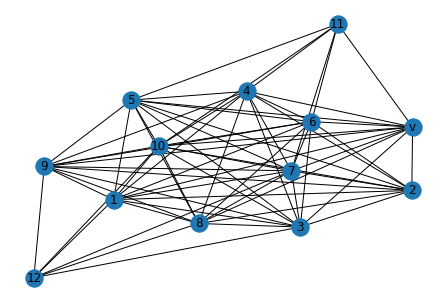

True

In [5]:
moralized_graph = wi.moralize(graph, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx()) 

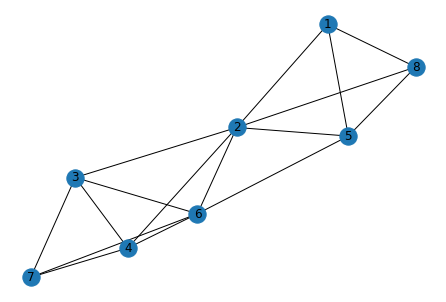

True

In [6]:
moralized_graph = wi.moralize(my_graph_test, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx()) 

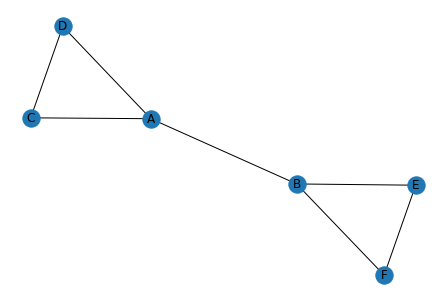

True

In [7]:
moralized_graph = wi.moralize(learning_graph, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx()) 

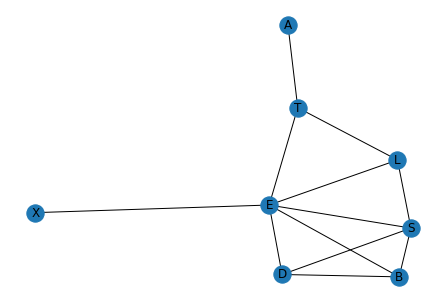

True

In [8]:
moralized_graph = wi.moralize(asia_graph, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx())

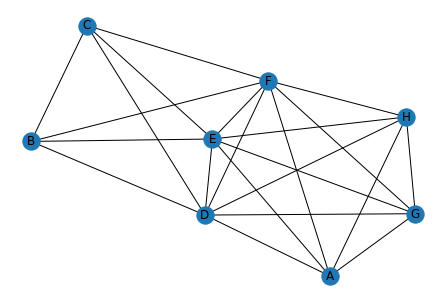

True

In [9]:
moralized_graph = wi.moralize(clgaussian_graph, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx())

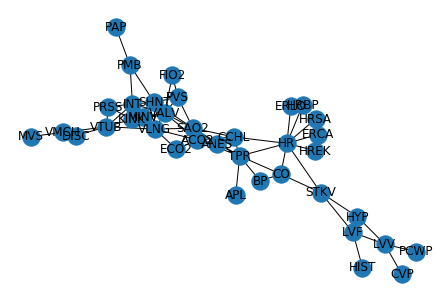

True

In [10]:
moralized_graph = wi.moralize(alarm_graph, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx())

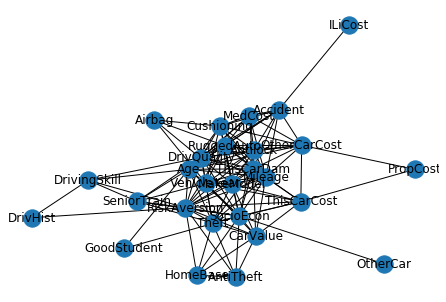

False

In [11]:
moralized_graph = wi.moralize(insurance_graph, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx())

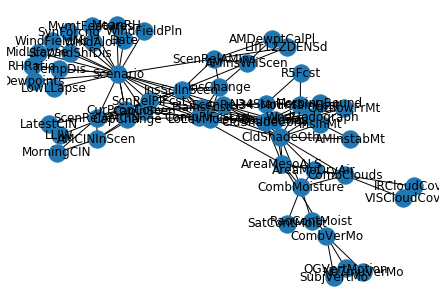

False

In [12]:
moralized_graph = wi.moralize(hailFinder_graph, force_parallel=True)
triangulate_graph = wi.min_qs_triangulate(moralized_graph)
nx.is_chordal(triangulate_graph.to_networkx())